# Redes Neuronales 2020 

## FAMAF - UNC 

### Práctico 1

El sistema de dos ecuaciones diferenciales ordinarias definico como:

$$\dot{C}(t) = \alpha C(t) − \beta C(t)Z(t)$$
$$\dot{Z}(t) = −\gamma Z(t) + \delta C(t)Z(t) $$

es conocido como **Modelo de predadores y prezas de Lotka-Volterra**. La función $C(t)$ modela el
número de conejos en un ecosistema dado, y $Z(t)$ la cantidad de zorros en el mismo ecosistema.

Para seguir la convención del libro y simplicar la notación, se escribirá el sistema anterior prescidiendo del parámetro $t$:

$$\dot{C} = \alpha C − \beta CZ$$
$$\dot{Z} = −\gamma Z + \delta CZ $$


Tenemos un sistema formado por un par de ecuaciones diferenciales de primer orden no lineales que modelan el crecimiento de 2 poblaciones que interactúan.

Explicación de las ecuaciones:

* La especie depredadora se alimenta sólo de la especie presa. La presa se nutre de un recurso que encuentra en el hábita en grandes cantidades.
* Las poblaciones son homogéneas.
* Existen las mismas características en todo el hábitat.
* La probabilidad de interacción entre ambas especies es la misma.

Explicación de los coefcientes:

* $\alpha$: tasa instantánea de aumento de conejos en ausencia de zorros.
* $\beta$: tasa instantánea de disminución de zorros en ausencia de conejos.
* $\gamma$: la susceptibilidad de conejos de ser cazados por zorros.
* $\delta$: la capacidad de depredación de los zorros.


a) Construí el diagrama de flujo con las herramientas teóricas presentadas en el curso para el caso
particular en que los parámetros toman los siguientes valores:
$$ \alpha= 0.1 \quad \beta = 0.02, \quad \gamma = 0.3 \quad y \quad  \delta = 0.01$$

<font color='green'> RESPUESTA </font>

Primero debemos encontrar los puntos fijos del sistema, es decir, los $(x^*, y^*)$ que simultáneamente satisfacen que:

$$\dot{C} = 0 \quad y \quad \dot{Z} = 0 $$

Es decir, son aquellos puntos en que la variaciones en la densidad de las respectivas poblaciones son nulas.

Notemos que:

$$\alpha C − \beta CZ = C(\alpha - \beta Z) = 0 \quad (1)$$
$$−\gamma Z + \delta CZ = Z(-\gamma - \delta C) = 0 \quad (2)$$

Por lo tanto un punto fijo es $P_1 = (0, 0)$. 

El otro punto fijo $P_2$, se obtiene por $(1)$ y $(2)$: 

$$C(\alpha - \beta Z) = 0 \iff (\alpha - \beta Z) = 0 \iff \alpha = \beta Z \iff Z = \dfrac{\alpha}{\beta}$$ 
$$Z(-\gamma + \delta C) = 0 \iff (-\gamma + \delta C) = 0 \iff \gamma = \delta C \iff C = \dfrac{\gamma}{\delta}$$ 

Luego $P_2 = (\dfrac{\gamma}{\delta}, \dfrac{\alpha}{\beta})$ 


Para estudiar estos puntos y observar la estabilidad del sistema, *linealizamos* el sistema de ecuaciones diferenciales. Al computar el Jacobiano nos queda:

$$A = 
\begin{bmatrix}
\dfrac{\partial \dot{C}}{\partial C} & \dfrac{\partial \dot{C}}{\partial Z} \\
\dfrac{\partial \dot{Z}}{\partial C} & \dfrac{\partial \dot{Z}}{\partial Z} 
\end{bmatrix} 
= 
\begin{bmatrix}
\alpha - \beta Z & -\beta C \\
\delta Z & -\gamma + \delta C  
\end{bmatrix}
= 
\begin{bmatrix}
0.1 - 0.02 Z & -0.02 C \\
0.01 Z & -0.3 + 0.01 C  
\end{bmatrix}
$$


In [2]:
from numpy import *
import pylab as p

### Definition of parameters 
alpha = 0.1
beta = 0.02
gamma = 0.3
delta = 0.01

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ alpha*X[0] -   beta*X[0]*X[1] ,  
                  -gamma*X[1] + delta*X[0]*X[1]])

In [3]:
# === Population equilibrium ===
# 
# Before using !SciPy to integrate this system, we will have a closer look on 
# position equilibrium. Equilibrium occurs when the growth rate is equal to 0.
# This gives two fixed points:
# 
X_f0 = array([     0. ,  0.])
X_f1 = array([gamma/delta, alpha/beta])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

True

In [4]:
# === Stability of the fixed points ===
# Near theses two points, the system can be linearized:
# dX_dt = A_f*X where A is the Jacobian matrix evaluated at the corresponding point.
# We have to define the Jacobian matrix:
# 

def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[alpha -beta*X[1],   -beta*X[0]],
                  [delta*X[1] ,   -gamma+delta*X[0]]])  

In [5]:
A_f0 = d2X_dt2(X_f0)
print('La matriz evaluada: ')
print(A_f0)
lambdas, vectors = linalg.eig(A_f0)
print()
print("Las lambdas son: ")
print('\t * lambdas:', lambdas)
print('\t * eigenvectors :', vectors[0], vectors[1])

La matriz evaluada: 
[[ 0.1 -0. ]
 [ 0.  -0.3]]

Las lambdas son: 
	 * lambdas: [ 0.1 -0.3]
	 * eigenvectors : [1. 0.] [0. 1.]


La matriz evaluada en el punto $P_1 = (0, 0)$ es 
$$\begin{bmatrix}
0.1 & 0 \\
0 & -0.3   
\end{bmatrix}$$

Para esta matriz calculamos que sus autovalores son: $\lambda_1 = 0.1$ y $\lambda_2 = -0.3$. Los autovectores correspondentes son: $v_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}$ y $v_2 = \begin{bmatrix}0 \\ 1\end{bmatrix}$. Estos resultados muestran que este punto de equilibrio es un **saddle node** (*punto de silla*) con soluciones que crecen exponencialmente a lo largo del eje $C$ y decrecen a lo largo del eje $Z$.

In [13]:
A_f1 = d2X_dt2(X_f1)
print('La matriz evaluada: ')
print(A_f1)
lambdas, vectors = linalg.eig(A_f1)
print()
print("Las lambdas son: ")
print('\t * lambdas:', lambdas)
print('\t * eigenvectors :', vectors[0], vectors[1])
T_f1 = 2*pi/abs(lambdas[0])

La matriz evaluada: 
[[ 0.   -0.6 ]
 [ 0.05  0.  ]]

Las lambdas son: 
	 * lambdas: [0.+0.17320508j 0.-0.17320508j]
	 * eigenvectors : [-0.96076892+0.j -0.96076892-0.j] [0.+0.2773501j 0.-0.2773501j]


Para esta matriz calculamos que sus autovalores son *imaginarios puros* (sin parte real): $\lambda_1, \lambda_2 = \pm 0.1732 i= \sqrt{ac} i $. Por esto todas las soluciones son periodicas con período $T = \dfrac{2\pi}{ac}$. Las oscilaciones tienen un amplitud fija y el punto fijo es un **centro**.

Para determinar si la rotación es horaria o antihoraria, se computan algunos vectores en el campo vectorial.

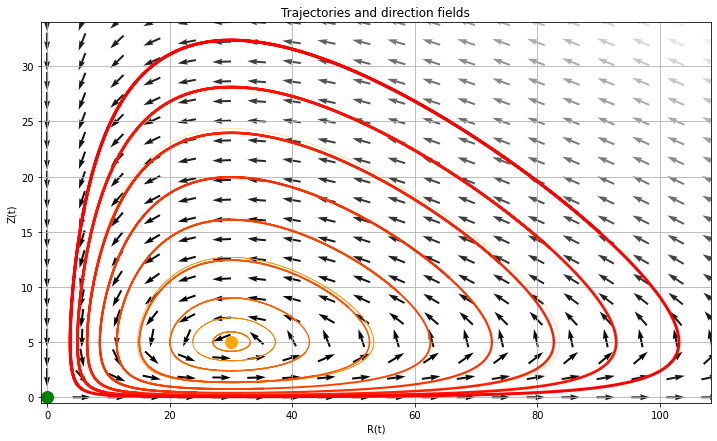

In [7]:
from scipy import integrate
t = linspace(0, 70,  5000)
values  = linspace(0, 3.0, 12)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure(figsize=(12, 7))

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=1.0*v, color=col)

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1] 
#ymax = 18                        # get axis limits
#xmax = 65 

nb_points   = 20                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M                                  

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.gray)
p.xlabel('R(t)')
p.ylabel('Z(t)')
p.grid()
p.xlim(-1, xmax)
p.ylim(-0.5, ymax)
p.plot(X_f0[0], X_f0[1], 'o', color='green', markersize=12)
p.plot(X_f1[0], X_f1[1], 'o', color='orange', markersize=12)
f2.savefig('rabbits_and_foxes_2.png')


b) Reflexione sobre los significados biológicos de cada uno de los términos y coeficientes $\alpha$, $\beta$, $\gamma$ y $\delta$ de las ecuaciones, construí y analizá biológicamente el diagrama de fase.

c) Econtrá una solución numérica aproximada al problema para el caso particular en que los parámetros
toman los siguientes valores del punto a) entre $t = 0$ y $t = 200$, para un paso de integración $h = 0.05$
para las condiciones iniciales:
   
   $$C(0) = 40 \quad y \quad Z(0) = 9$$
   
d) Graficá, con los resultados del punto anterior, $C(t)$ vs. $Z(t)$ en un mismo gráfico (gráfico paramétrico),
entre $t = 0$ y $t = 200$, y comentá los resultados.


**Nota 1:** Presentá un informe escrito, de pocas páginas (no más de cinco), con tı́tulo, nombre, materia,
gráficos y conclusiones, como mı́nimo.

**Nota 2:** Para integrar numéricamente las ecuaciones (punto b) podés usar cualquier técnica. Recomiendo
que quienes sepan programar implementen el método de Runge-Kutta de cuarto orden, y que quienes no,
usen algún método en lı́nea.

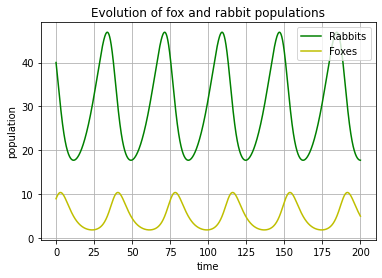

In [12]:
t = arange(0, 200, 0.05)              # time
X0 = array([40, 9])                     # initials conditions: 10 rabbits and 5 foxes  

X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'
# 
# `infodict` is optional, and you can omit the `full_output` argument if you don't want it.
# Type "info(odeint)" if you want more information about odeint inputs and outputs.
# 
# We can now use Matplotlib to plot the evolution of both populations:
# 
rabbits, foxes = X.T

f1 = p.figure()
p.plot(t, rabbits, 'g-', label='Rabbits')
p.plot(t, foxes  , 'y-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')